In [1]:
from Model2 import RiverDeltaModel
import matplotlib.pyplot as plt
import networkx as nx
import warnings 
import matplotlib.lines as mlines

c:\Users\sjuul\anaconda3\envs\afstuderen2025\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
warnings.simplefilter("ignore")

model = RiverDeltaModel()

pos = nx.spring_layout(model.G)

for j in range(300):
    model.step()

91
100
100
100
100
100
100
100
100
shock is happening!!
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100


In [3]:
agent_data = model.datacollector.get_agent_vars_dataframe()
agent_data = agent_data.xs(4, level="AgentID")
#agent_data = agent_data[agent_data["Agent_type"] == "Agri_small_saline"]
agent_data

,Agent_type,Age,Salinity,Savings,Loan_size,maximum_debt,income,abilities,current_crop,New crop
Step,,,,,,,,,,
12,Agri_small_saline,"[4, 5, 44, 45, 62]",1.773276,5612.731378,0.0,7580.58635,2299.689342,"[{'strategy': 'Rice', 'FA': 1, 'IA': 1, 'TA': ...",Rice,Rice
24,Agri_small_saline,"[5, 6, 45, 46, 63]",1.773276,7085.911349,0.0,7580.58635,1867.959074,"[{'strategy': 'Rice', 'FA': 1, 'IA': 1, 'TA': ...",Rice,Rice
36,Agri_small_saline,"[6, 7, 46, 47, 64]",1.773276,8402.013236,0.0,7580.58635,1710.880991,"[{'strategy': 'Rice', 'FA': 1, 'IA': 1, 'TA': ...",Rice,Rice
48,Agri_small_saline,"[7, 8, 47, 48, 65]",1.773276,9925.656937,0.0,7580.58635,1918.422806,"[{'strategy': 'Rice', 'FA': 1, 'IA': 1, 'TA': ...",Rice,Rice
60,Agri_small_saline,"[8, 9, 48, 49, 66]",1.773276,11512.209023,0.0,7580.58635,1981.331190,"[{'strategy': 'Rice', 'FA': 1, 'IA': 1, 'TA': ...",Rice,Rice
72,Agri_small_saline,"[9, 10, 49, 50, 67]",1.773276,12994.573337,0.0,7580.58635,1877.143418,"[{'strategy': 'Rice', 'FA': 1, 'IA': 1, 'TA': ...",Rice,Rice
84,Agri_small_saline,"[10, 11, 50, 51, 68]",1.773276,14336.398748,0.0,7580.58635,1736.604515,"[{'strategy': 'Rice', 'FA': 1, 'IA': 1, 'TA': ...",Rice,Rice
96,Agri_small_saline,"[11, 12, 51, 52, 69]",1.773276,16029.607919,0.0,7580.58635,2087.988275,"[{'strategy': 'Rice', 'FA': 1, 'IA': 1, 'TA': ...",Rice,Rice
108,Agri_small_saline,"[12, 13, 52, 53, 70]",1.773276,17658.728109,0.0,7580.58635,2023.899294,"[{'strategy': 'Rice', 'FA': 1, 'IA': 1, 'TA': ...",Rice,Rice


### PLOT AGENTS ON THE MAP

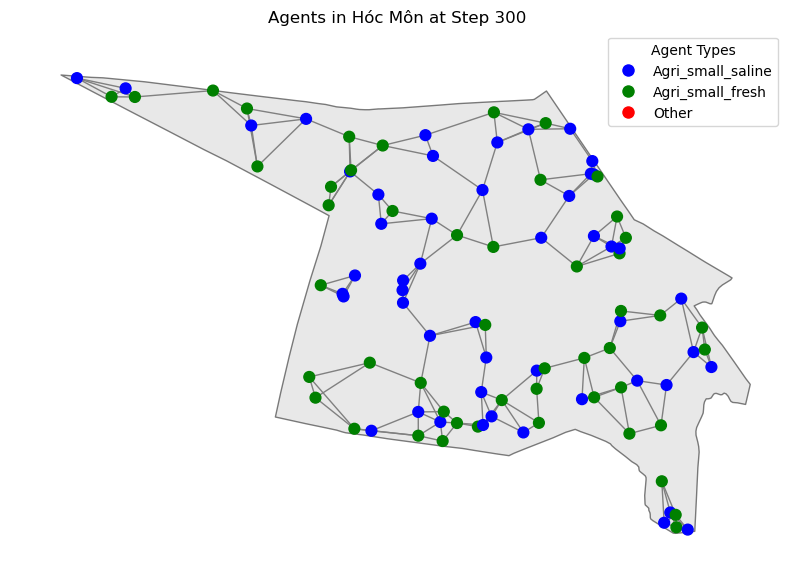

In [4]:
import matplotlib.lines as mlines
from Agents2 import Agri_farmer

def plot_network(ax, model):
    ax.clear()

    # Plot district map, based on district polygon we defined earlier
    model.polygon_districts.plot(ax=ax, facecolor="lightgray", edgecolor="black", alpha=0.5)

    # Get the positions of the nodes
    pos = nx.get_node_attributes(model.G, 'pos')

    # Each farmer agent should be represented by a node. A dictionary is created where each node id will correspond with an agent
    node_to_agent = {}
    for agent in model.agents:
        if isinstance(agent, Agri_farmer): # Only farmer agents need to be plotted
            node_to_agent[agent.node_id] = agent

    # Give each node a color, based on their agent type
    colors = []
    for node_id in model.G.nodes():
        agent = node_to_agent.get(node_id)  
        if agent:
            if agent.agent_type == "Agri_small_saline":
                colors.append('blue')
            elif agent.agent_type == "Agri_small_fresh":
                colors.append('green')
            else:
                colors.append('red')  
        else:
            colors.append("gray")  # something went wrong here, so the node is then gray

    # Add legend
    blue_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Agri_small_saline')
    green_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='green', markersize=10, label='Agri_small_fresh')
    red_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='red', markersize=10, label='Other')
    ax.legend(handles=[blue_patch, green_patch, red_patch], loc='upper right', title='Agent Types')

    # Plot netwerk
    nx.draw(model.G, pos, node_color=colors, node_size=60, edge_color="gray", ax=ax)
    ax.set_title(f"Agents in {model.district} at Step {model.steps}", fontsize=12)

# Call function above to plot the map
fig, ax = plt.subplots(figsize=(10, 10))
plot_network(ax, model)
plt.show()
